In [86]:
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
import mne

In [87]:
# read the EEG data
subject_id = 1
eeg_path = os.path.join('..', '..', 'data', str(subject_id), 'eeg_before.mat')
eeg_before = loadmat(eeg_path)['eeg']
eeg_before *= 1e-6 # convert to microvolts
print(eeg_before)

[[ 9.93108333e-05  9.93116667e-05  9.93125000e-05 ...  6.39111667e-04
   6.39112500e-04  6.39113333e-04]
 [-1.30753078e-05 -1.11645279e-05 -9.38033009e-06 ... -8.72190714e-07
  -2.72975874e-06 -4.16689777e-06]
 [-7.52268887e-06 -6.04549503e-06 -4.68539667e-06 ... -4.55986738e-06
  -5.63638830e-06 -6.73268747e-06]
 ...
 [ 9.82015228e-06  1.26663399e-05  1.51030693e-05 ... -1.20776281e-05
  -1.25055914e-05 -1.27502394e-05]
 [-9.46703053e-06 -6.75618410e-06 -4.62828922e-06 ... -1.66025791e-05
  -1.63224983e-05 -1.57008018e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [ ]:
behavior_path = os.path.join('..', '..', 'data', str(subject_id), 'behavior_before.mat')
behavior_before = pd.read_csv(behavior_path)


In [88]:
# get montage of standard 10-20 EEG system
# Create the standard 10-20 montage
montage_1020 = mne.channels.make_standard_montage('standard_1020')
# Get the channel positions in the 'head' coordinate frame
positions_1020 = montage_1020._get_ch_pos()
# Get the elec_coords dictionary
elec_coords_1020 = {ch_name: coord for ch_name, coord in positions_1020.items() if ch_name in montage_1020.ch_names}
print(elec_coords_1020['Fp1'])
print(elec_coords_1020)

[-0.0294367  0.0839171 -0.00699  ]
{'Fp1': array([-0.0294367,  0.0839171, -0.00699  ]), 'Fpz': array([ 0.0001123,  0.088247 , -0.001713 ]), 'Fp2': array([ 0.0298723,  0.0848959, -0.00708  ]), 'AF9': array([-0.0489708,  0.0640872, -0.047683 ]), 'AF7': array([-0.0548397,  0.0685722, -0.01059  ]), 'AF5': array([-0.0454307,  0.0728622,  0.005978 ]), 'AF3': array([-0.0337007,  0.0768371,  0.021227 ]), 'AF1': array([-0.0184717,  0.0799041,  0.032752 ]), 'AFz': array([0.0002313, 0.080771 , 0.035417 ]), 'AF2': array([0.0198203, 0.0803019, 0.032764 ]), 'AF4': array([0.0357123, 0.0777259, 0.021956 ]), 'AF6': array([0.0465843, 0.0738078, 0.006034 ]), 'AF8': array([ 0.0557433,  0.0696568, -0.010755 ]), 'AF10': array([ 0.0504352,  0.0638698, -0.048005 ]), 'F9': array([-0.0701019,  0.0416523, -0.049952 ]), 'F7': array([-0.0702629,  0.0424743, -0.01142  ]), 'F5': array([-0.0644658,  0.0480353,  0.016921 ]), 'F3': array([-0.0502438,  0.0531112,  0.042192 ]), 'F1': array([-0.0274958,  0.0569311,  0.060

In [89]:
# create info object
# Define channel names and types
ch_names = ['Time'] + ['Fp1', 'Fp2', 
                       'AF3', 'AF4', 
                       'F7', 'F3', 'Fz', 'F4', 'F8',
                       'FC1', 'FC2',
                       'T7', 'C3', 'Cz', 'C4', 'T8',
                       'CP5', 'CP1', 'CP2', 'CP6',
                       'P7', 'P5', 'P3', 'Pz', 'P4', 'P6', 'P8',
                       'PO3', 'PO4',
                       'O1', 'Oz', 'O2'] + ['Trigger']
ch_types = ['misc'] + ['eeg'] * 32 + ['stim']

# Create the info object
info = mne.create_info(ch_names, sfreq=1200, ch_types=ch_types)
# Create raw object
raw = mne.io.RawArray(eeg_before, info)

Creating RawArray with float64 data, n_channels=34, n_times=647764
    Range : 0 ... 647763 =      0.000 ...   539.803 secs
Ready.


In [90]:
elec_coords = {
    'Fp1': elec_coords_1020['Fp1'],
    'Fp2': elec_coords_1020['Fp2'],
    'AF3': elec_coords_1020['AF3'],
    'AF4': elec_coords_1020['AF4'],
    'F7': elec_coords_1020['F7'],
    'F3': elec_coords_1020['F3'],
    'Fz': elec_coords_1020['Fz'],
    'F4': elec_coords_1020['F4'],
    'F8': elec_coords_1020['F8'],
    'FC1': elec_coords_1020['FC1'],
    'FC2': elec_coords_1020['FC2'],
    'T7': elec_coords_1020['T7'],
    'C3': elec_coords_1020['C3'],
    'Cz': elec_coords_1020['Cz'],
    'C4': elec_coords_1020['C4'],
    'T8': elec_coords_1020['T8'],
    'CP5': elec_coords_1020['CP5'],
    'CP1': elec_coords_1020['CP1'],
    'CP2': elec_coords_1020['CP2'],
    'CP6': elec_coords_1020['CP6'],
    'P7': elec_coords_1020['P7'],
    'P5': elec_coords_1020['P5'],
    'P3': elec_coords_1020['P3'],
    'Pz': elec_coords_1020['Pz'],
    'P4': elec_coords_1020['P4'],
    'P6': elec_coords_1020['P6'],
    'P8': elec_coords_1020['P8'],
    'PO3': elec_coords_1020['PO3'],
    'PO4': elec_coords_1020['PO4'],
    'O1': elec_coords_1020['O1'],
    'Oz': elec_coords_1020['Oz'],
    'O2': elec_coords_1020['O2'],
}

# Create the montage object
montage = mne.channels.make_dig_montage(elec_coords, coord_frame='head')

In [91]:
raw.info['subject_info'] = {'id': subject_id}
raw.info
print(raw.info['subject_info'])

{'id': 1}


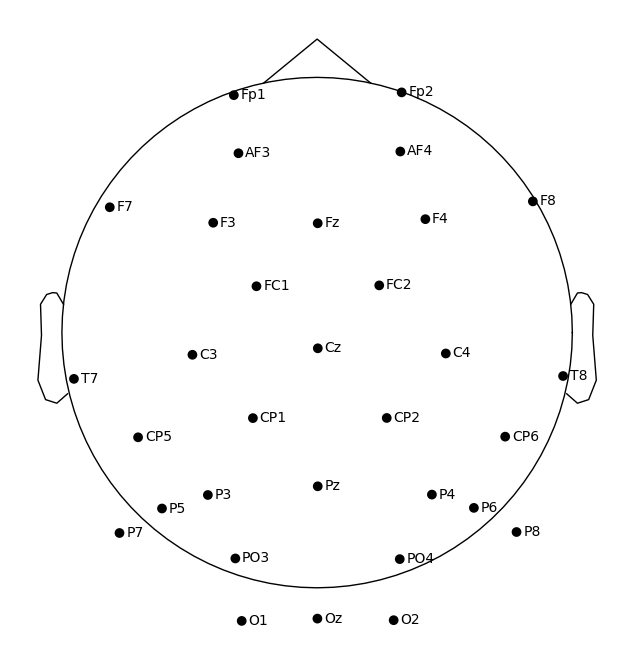

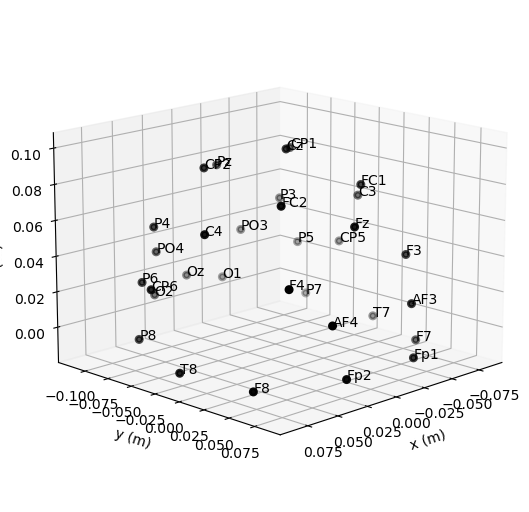

In [92]:
montage.plot()  # 2D
fig = montage.plot(kind='3d', show=False)  # 3D
fig = fig.gca().view_init(azim=45, elev=15)  # set view angle for tutorial

Using pyopengl with version 3.1.1a1


Channels marked as bad:
none
